# SETUP

Need the standard framework:


In [46]:
# To automatically reload modules defined in external files.
%reload_ext autoreload
%autoreload 2

# To display plots directly in the notebook:
%matplotlib inline

In [47]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


import seaborn as sns # For nicer plots

In [48]:
# To make the notebook reproducible
seed = 42
np.random.seed(seed)

# Get some insight of the data

In [49]:
import os
os.listdir("data")

['sample_submission.csv', 'test.csv', 'train.csv']

In [50]:
#Reads the csv files and creates a dataframe

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [51]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


# We already see that some colums will be dropped, original title for sure (since we have english title), homepage (can be useful for external data), imdb_id and poster path will be removed

In [52]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

We can already see we need to find a way to deal with null values

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [55]:
len(train), len(test)

(3000, 4398)

In [56]:
#pd.options.display.max_colwidth = 1000

In [57]:
#train.head()['crew']

# Data Prep


# Explore data

Let's take a look at some of the variables, more specifically: budget, runtime and popularity


# Let's make some plots


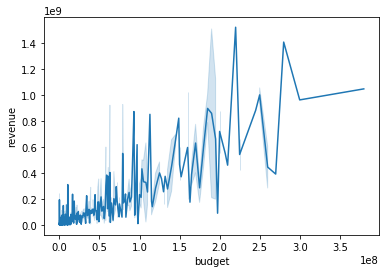

In [58]:
ax = sns.lineplot(x='budget', y='revenue', data=train)

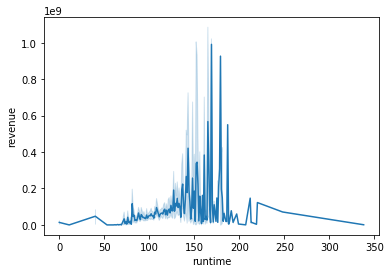

In [59]:
ax = sns.lineplot(x='runtime', y='revenue', data=train)

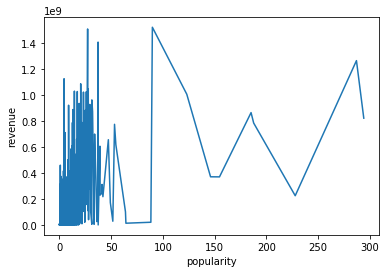

In [60]:
ax = sns.lineplot(x='popularity', y='revenue', data=train)

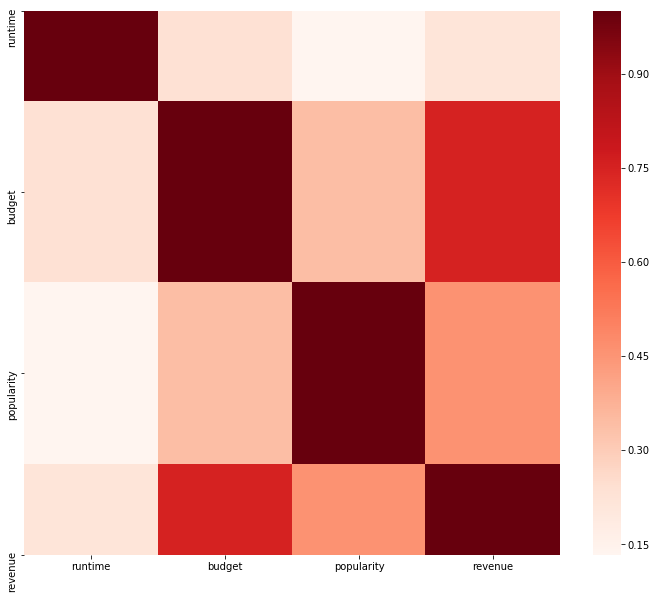

In [61]:
features = ['runtime', 'budget', 'popularity', 'revenue']
plt.subplots(figsize=(12,10))
corr = train[features].corr()
sns.heatmap(corr, cmap="Reds")

#Heatmap er bedre
#fig = sns.PairGrid(train[['runtime', 'budget', 'popularity', 'revenue']].dropna()) #dropna dropper nullverdier
#fig.map_upper(plt.scatter, color = 'red')
#fig.map_lower(plt.scatter, color = 'm')
#fig.map_diag(sns.distplot, bins = 30)

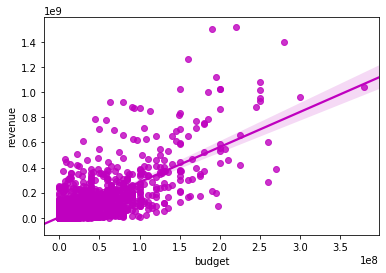

In [62]:
ax = sns.regplot(x="budget", y="revenue", data=train, color ="m", ) 
#1e9 = 10^9

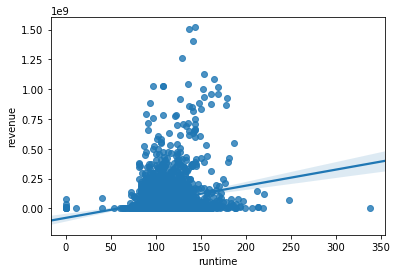

In [63]:
ax = sns.regplot(x="runtime", y="revenue", data=train)

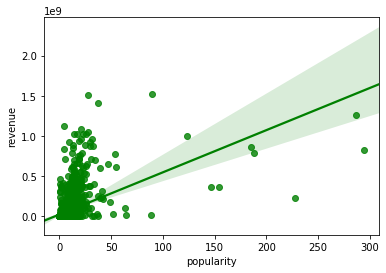

In [64]:
ax = sns.regplot(x="popularity", y="revenue", data=train, color ="g")

# We see that budget and popularity has a big impact on revenue earned. Runtime also has some impact, although not as much as the previous two 

# Data cleaning and Data prep

This function will be used to clean up some of the features:

In [65]:
def featureCounterTrain(feature, name):
    counter = []
    for i in train[feature]:
        if(not(pd.isnull(i))):
            counter.append(len(eval(i)))
        else:
            counter.append(0)
    train[name] = counter

In [66]:
def featureCounterTest(feature, name):
    counter = []
    for i in test[feature]:
        if(not(pd.isnull(i))):
            counter.append(len(eval(i)))
        else:
            counter.append(0)
    test[name] = counter

Removing some features, that are useless to us in this assigment:

In [67]:
train.drop(columns=['homepage', 'original_title', 'imdb_id', 'poster_path', 'status'], axis =1, inplace=True)
test.drop(columns=['homepage', 'original_title', 'imdb_id', 'poster_path', 'status'], axis =1, inplace=True)

As expected, there are many null values

In [68]:
train.isnull().sum().sum()

3546

Missing by feature:

In [69]:
pd.set_option("display.max_rows", None) # To print all rows below

In [70]:
train.isnull().sum().sort_values(ascending=False)

belongs_to_collection    2396
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
original_language           0
budget                      0
revenue                     0
popularity                  0
release_date                0
title                       0
id                          0
dtype: int64

With closer inspection we see that there are few variables that have missing values

In [71]:
test.isnull().sum().sort_values(ascending=False)

belongs_to_collection    3521
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22
genres                     16
overview                   14
cast                       13
runtime                     4
title                       3
release_date                1
popularity                  0
original_language           0
budget                      0
id                          0
dtype: int64

We're gonna clean up all the null by making some changes to how we look at the data

# Starting with the easiest: Runtime

In [72]:
#As there are very few entries missing I will use the mean to fill the blanks
train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(train['runtime'].mean())

# Looking at belongs_to_collection 

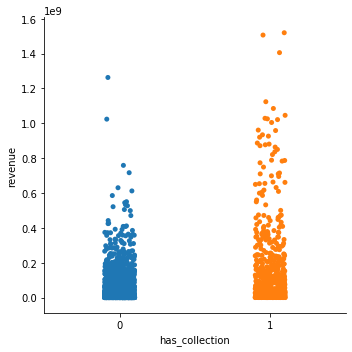

In [73]:
# Making it binary, could also make it boolean, but in this case it does not matter, They both do the same job. 
# We also get rid of all null values here by assigning them to the value 0. 
train['has_collection'] = 0
test['has_collection'] = 0
train.loc[train['belongs_to_collection'].isnull() == False, 'has_collection'] = 1
test.loc[test['belongs_to_collection'].isnull() == False, 'has_collection'] = 1

sns.catplot(x='has_collection', y='revenue', data=train);

We see that a movie being a part of a collection increases revenue

In [74]:
train = train.drop(['belongs_to_collection'], axis = 1)
test = test.drop(['belongs_to_collection'], axis = 1)

# Lets go to the next feature: Genres!

In [75]:
#Let's look at how many genres a movie has
featureCounterTrain('genres', 'gn')    

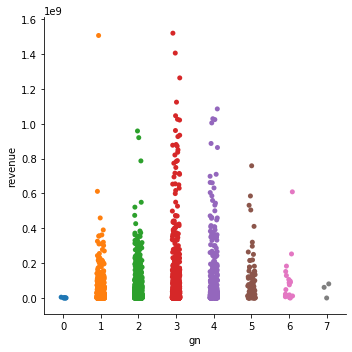

In [76]:
#Let's try and plot it using catplot again...

sns.catplot(x = 'gn', y = 'revenue', data=train)



We see that number of genres also makes revenue

In [77]:
#let's do the same for the test set
featureCounterTest('genres', 'gn')

In [78]:
#dropping genres as it is of no use anymore
train = train.drop(['genres'], axis = 1)
test = test.drop(['genres'], axis = 1)

# Overiview


there's not alot of movies missing an overview, but I would guess that a movie with an overview would do better than a movie without, so let's try and implement that, thinking back to belongs_to_collection

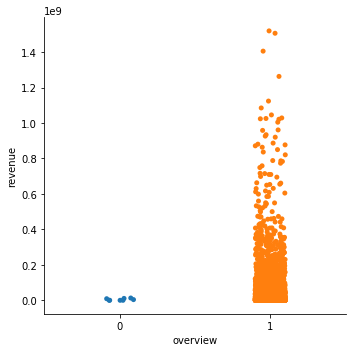

In [79]:
#train['has_overview'] = 0
#test['has_overview'] = 0
#train.loc[train['overview'].isnull() == False, 'has_overview'] = 1
#test.loc[test['overview'].isnull() == False, 'has_overview'] = 1

#sns.catplot(x='has_overview', y='revenue', data=train);

#possible to use lambda instead
train['overview'] = train['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['overview'] = test['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)

sns.catplot(x = 'overview', y = 'revenue', data=train)

In [80]:
#If we don't use lambda
#train = train.drop(['overview'], axis=1)
#test = test.drop(['overview'], axis =1)

# Next feature up is production_companies


In [81]:
#Using count function

featureCounterTrain('production_companies', 'num_of_production_companies')

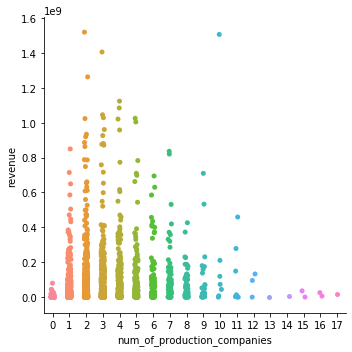

In [82]:
#Let's try and plot it with seaborn's catplot again
sns.catplot(x='num_of_production_companies', y='revenue', data=train)

we see that fewer production companies is better, sometimes less is more

In [83]:
#same for test set:
featureCounterTrain('production_companies', 'num_of_production_companies')

In [84]:
#Let's drop the production company column
train = train.drop(['production_companies'], axis = 1)
test = test.drop(['production_companies'], axis=1)

# Onto the next feature... production_countries!

In [85]:
#Using function
featureCounterTrain('production_countries', 'num_of_prod_countries')

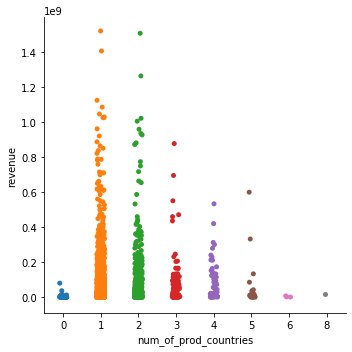

In [86]:
#Once more let's make a plot to see
sns.catplot(x='num_of_prod_countries', y='revenue', data=train)

Yet again we see that less is more

In [87]:
#Counting up again for test set
featureCounterTest('production_countries', 'num_of_prod_countries')

In [88]:
train = train.drop(['production_countries'], axis = 1)
test = test.drop(['production_countries'] , axis = 1)

# Releasedate

Let's split up realease date to release year, day and month. 

In [89]:
train[['release_month', 'release_day', 'release_year']] = train['release_date'].str.split('/', expand =True).replace(np.nan, 0).astype(int)
train['release_year'] = train['release_year']
train.loc[ (train['release_year'] <= 18) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 18)  & (train['release_year'] < 100), "release_year"] += 1900
    

In [90]:
test[['release_month', 'release_day', 'release_year']] = test['release_date'].str.split('/', expand =True).replace(np.nan, 0).astype(int)
test['release_year'] = test['release_year']
test.loc[ (test['release_year'] <= 18) & (test['release_year'] < 100), "release_year"] += 2000
test.loc[ (test['release_year'] > 18)  & (test['release_year'] < 100), "release_year"] += 1900
    

In [91]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [92]:
train['release_dayofweek'] = train['release_date'].dt.dayofweek 
test['release_dayofweek'] = test['release_date'].dt.dayofweek 

In [93]:
train = train.drop(['release_date'], axis=1)
test = test.drop(['release_date'], axis=1)

# CAST AND CREW

# Starting with Cast

So the way I want to look at this is if the size of the cast/crew matters. I.e if a cast with 100 people generates more than a cast of 10. Let's try and plot this first:

In [94]:

featureCounterTrain('cast', 'num_of_cast')

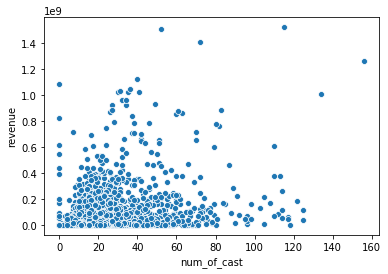

In [95]:
#Let's use scatterplot instead of catplot, there would be too many entries in catplot to make it usable...
sns.scatterplot(x='num_of_cast', y='revenue', data=train)

Looks ok, let's make  cast_count for test set aswell and drop the original cast column

In [96]:
featureCounterTrain('cast', 'num_of_cast')

In [97]:
train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

Let's do the same for crew, I would suspect if there was a movie with well known actors and directors the generated revenue would be alot more, but for this time I would like to keep it a bit simpler

In [98]:
#let's do the same for crew
featureCounterTrain('crew', 'num_of_crew')

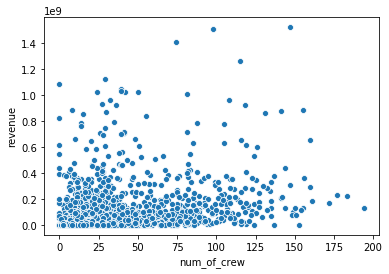

In [99]:
#Let's plot it with sns scatterplot again
sns.scatterplot(x='num_of_crew', y='revenue', data=train)

Looks reasonable, let's fix up our test set again.

In [100]:
featureCounterTrain('crew', 'num_of_crew')

In [101]:
#Dropping crew column as it is no longer of use
train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

# Keywords

I'm thinking we're going through the same process of making a counter, as keywords will be determined by how many there is. I would imagine that having few important keywords will generate more revenue. Having too many keywords makes it hard to even remember. 

In [102]:
#Let's test the hypothesis above
featureCounterTrain('Keywords', 'num_of_keywords')

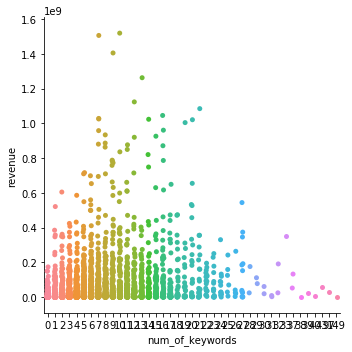

In [103]:
#As per usual catplot will be the best representation 
sns.catplot(x='num_of_keywords', y='revenue', data=train)

In [104]:
featureCounterTest('Keywords', 'num_of_keywords')

In [105]:
train = train.drop(['Keywords'], axis = 1)
test = test.drop(['Keywords'], axis = 1)

# Languages?

this is harder to make data prep with, because most movies has english as original_language, however there can be some other languages that generates revenue. Let's make a plot to see if there is.

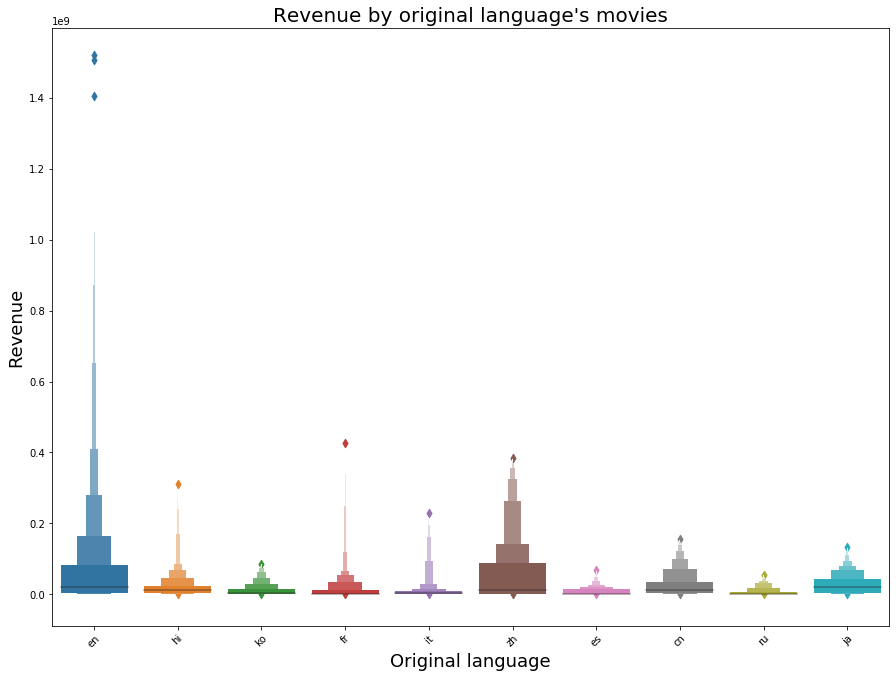

In [106]:
#this plot is universally used on the kaggle forums to repressent revenue by languages, I will borrow it for the sake of a better visual over languages

plt.figure(figsize=(15,11)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.boxenplot(x='original_language', y='revenue', 
                   data=train[(train['original_language'].isin((train['original_language'].value_counts()[:10].index.values)))])
g1.set_title("Revenue by original language's movies", fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Original language', fontsize=18) # Xlabel
g1.set_ylabel('Revenue', fontsize=18) #Ylabel

plt.show()

en is the winner overall here, but zh also has some above average grossing movies. Fr seems to have one high grossing movie but is it enough to account for? Probably not, but I will try*. First thing that comes to mind is that we can make en and zh two seperate values and set the rest to 0. E.g en = 1, zh = 2, rest = 0. 

In [107]:
#Using lambda to make en = 1, zh = 2and rest = 0:
train['original_language'] = train['original_language'].apply(lambda x: 1 if x == 'en' else(2 if x == 'zh' else 0)) #(3 if x == 'fr' else 0))) don't quite know about this yet
test['original_language'] = test['original_language'].apply(lambda x: 1 if x == 'en' else(2 if x == 'zh' else 0)) #(3 if x == 'fr' else 0)))

In [108]:
#also have to fix spoken languages, easiest fix is to count them all up again in a for loop yet again, or maybe use the mean and map that to missing values. 
featureCounterTrain('spoken_languages', 'spoken_lango')
featureCounterTest('spoken_languages', 'spoken_lango')

In [109]:
train = train.drop(['spoken_languages'], axis = 1)
test = test.drop(['spoken_languages'], axis = 1)

# Only tagline remains with null values


In [110]:
#Tagline exists or not
train ['tagline'] = train['tagline'].apply(lambda x: 1 if(not(pd.isnull(x))) else 0)
test ['tagline'] = test['tagline'].apply(lambda x: 1 if(not(pd.isnull(x))) else 0)

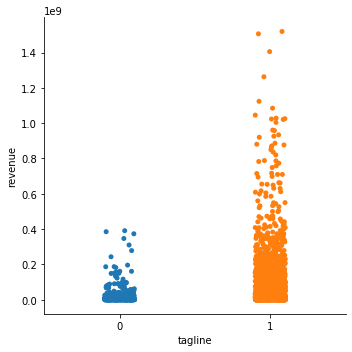

In [111]:
sns.catplot(x='tagline', y='revenue', data=train)

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
id                             3000 non-null int64
budget                         3000 non-null int64
original_language              3000 non-null int64
overview                       3000 non-null int64
popularity                     3000 non-null float64
runtime                        3000 non-null float64
tagline                        3000 non-null int64
title                          3000 non-null object
revenue                        3000 non-null int64
has_collection                 3000 non-null int64
gn                             3000 non-null int64
num_of_production_companies    3000 non-null int64
num_of_prod_countries          3000 non-null int64
release_month                  3000 non-null int32
release_day                    3000 non-null int32
release_year                   3000 non-null int32
release_dayofweek              3000 non-null int64
num_of_cast          

In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 17 columns):
id                       4398 non-null int64
budget                   4398 non-null int64
original_language        4398 non-null int64
overview                 4398 non-null int64
popularity               4398 non-null float64
runtime                  4398 non-null float64
tagline                  4398 non-null int64
title                    4395 non-null object
has_collection           4398 non-null int64
gn                       4398 non-null int64
num_of_prod_countries    4398 non-null int64
release_month            4398 non-null int32
release_day              4398 non-null int32
release_year             4398 non-null int32
release_dayofweek        4397 non-null float64
num_of_keywords          4398 non-null int64
spoken_lango             4398 non-null int64
dtypes: float64(3), int32(3), int64(10), object(1)
memory usage: 532.7+ KB


In [114]:
#We drop title as I forgot earlier
train = train.drop(['title'], axis = 1)
test = test.drop(['title'], axis = 1)

In [115]:
test['release_dayofweek'] = test['release_dayofweek'].fillna(0) #1 missing value for some reason

# Time to create model

First we create the X and y for our data

In [1]:
y = train['revenue'].values
features = list(train.columns)
features = [i for i in features if i not in['revenue', 'id']]
X = train[features].values
#y = np.log1p(y)  # Get cleaner numbers

NameError: name 'train' is not defined

try linear regression

In [713]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
scores = cross_val_score(clf, X, y, scoring="neg_mean_squared_error", cv = 15) #generate the scores from cvs
rmse_scores = np.sqrt(-scores) #generate rmse for cvs
print(rmse_scores.mean())

2.472185946520382


In [714]:
from sklearn.ensemble import RandomForestRegressor
rfr_clf = RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=0,
                             n_estimators=500)
scores = cross_val_score(regr, X, y, scoring="neg_mean_squared_error", cv=15) #generate the scores from cvs
rmse_scores = np.sqrt(-scores) #generate rmse for cvs
print(rmse_scores.mean())

2.13770977237167


Have to fix for test set so we can test the model.

In [715]:
features_test = list(test.columns)
features_test = [i for i in features_test if i not in['id']] 
X_test = test[features_test].values

In [716]:
rfr_clf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [717]:
y_pred = regr.predict(X_test)